In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def impulse(x):
    if(x == 0):
        return 1
    return 0

def op_gen(n,m):
    if(n < 0):
        return 0
    return m[n]

## Question 1
For the LTI systems described by the following difference equations, generate its impulse response, and 
unit step response. Comment on the properties of the system. 
\begin{equation}\nonumber
(a)~~y[n]-0.3695y[n-1]+0.1958y[n-2]=0.2066x[n]+0.4131x[n-1]+0.2066x[n-2]
\end{equation}
\begin{equation}\nonumber
 (b)~~~~~~~y[n]=0.77y[n-1]+x[n]+x[n-1]
\end{equation}
\begin{equation}\nonumber
 (c)~y[n]=0.77y[n-1]+0.77x[n]+x[n-1] 
\end{equation}

In [53]:
n = 50
ir = []
sr = []

<StemContainer object of 3 artists>

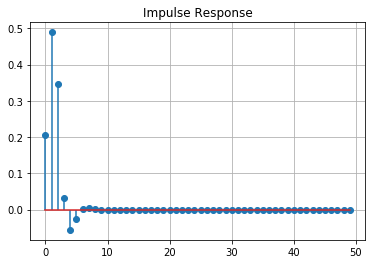

In [54]:
for i in range(0, n):
    ir.append(0.3695*op_gen(i-1, ir) - 0.1958*op_gen(i-2, ir) + 0.2066*impulse(i) + 0.4131*impulse(i-1) + 0.2066*impulse(i-2))

plt.title("Impulse Response")
plt.grid()
plt.stem(ir, use_line_collection=True)

<StemContainer object of 3 artists>

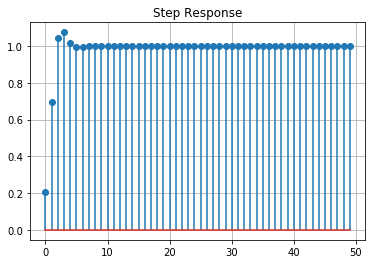

In [52]:
for i in range(n):
    sr.append(0.3695*op_gen(i-1, sr) - 0.1958*op_gen(i-2, sr) + 0.2066*np.heaviside(i,1) + 0.4131*np.heaviside(i-1,1) + 0.2066*np.heaviside(i-2,1))

plt.title("Step Response")
plt.grid()
plt.stem(sr, use_line_collection=True)

<StemContainer object of 3 artists>

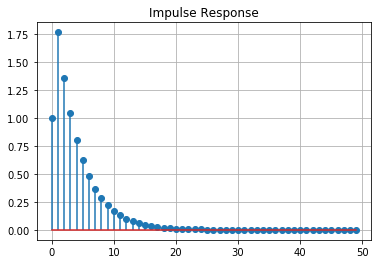

In [60]:
ir = []

for i in range(0, n):
    ir.append(0.77*op_gen(i-1,ir) + impulse(i) + impulse(i-1))

plt.title("Impulse Response")
plt.grid()
plt.stem(ir, use_line_collection=True)

<StemContainer object of 3 artists>

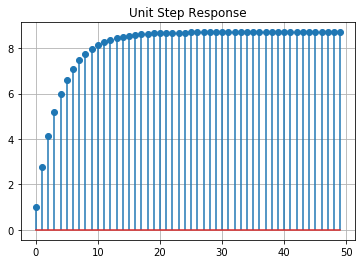

In [61]:
sr = []

for i in range(0, n):
    sr.append(0.77*op_gen(i-1,sr) + np.heaviside(i, 1) + np.heaviside(i-1, 1))

plt.title("Unit Step Response")
plt.grid()
plt.stem(sr, use_line_collection=True)

<StemContainer object of 3 artists>

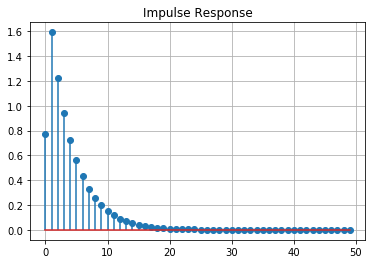

In [62]:
ir = []

for i in range(0, n):
    ir.append(0.77*op_gen(i-1,ir) + 0.77*impulse(i) + impulse(i-1))

plt.title("Impulse Response")
plt.grid()
plt.stem(ir, use_line_collection=True)

<StemContainer object of 3 artists>

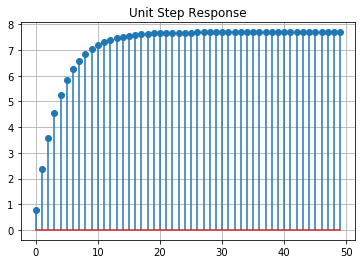

In [64]:
sr = []

for i in range(0, n):
    sr.append(0.77*op_gen(i-1,sr) + 0.77*np.heaviside(i, 1) + np.heaviside(i-1, 1))

plt.title("Unit Step Response")
plt.grid()
plt.stem(sr, use_line_collection=True)

## Question 2
Solve the system difference equation $y[n]-0.8y[n-1]=0.5(x[n]+x[n-1])$ with the intial condition is given by
$y[-1]=-2$. Plot the output sequence for input (a) $x[n]=u[n]-u[n-10]$ and (b) $x[n]=2(u[n]-u[n-10])$. Could the system
be linear? Repeat the experiment with zero intial conditions.

<StemContainer object of 3 artists>

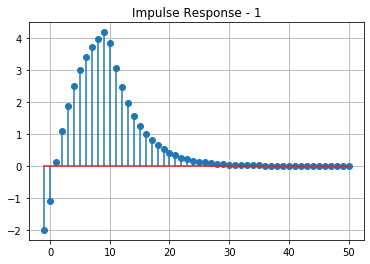

In [80]:
def xn1(n):
    return np.heaviside(n, 1) - np.heaviside(n-10, 1)

def xn2(n):
    return 2*xn1(n)

op_seq = [-2]

n = 50
for i in range(-1, n):
    op_seq.append(0.8*op_gen(i+1,op_seq) + 0.5*xn1(i+1) + 0.5*xn1(i))

plt.title("Impulse Response - 1")
plt.grid()
plt.stem(np.arange(-1, 51, 1), op_seq, use_line_collection=True)

<StemContainer object of 3 artists>

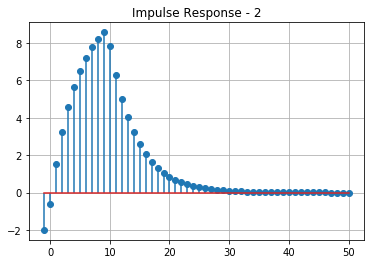

In [81]:
op_seq = [-2]

for i in range(-1, n):
    op_seq.append(0.8*op_gen(i+1,op_seq) + 0.5*xn2(i+1) + 0.5*xn2(i))

plt.title("Impulse Response - 2")
plt.grid()
plt.stem(np.arange(-1, 51, 1), op_seq, use_line_collection=True)

<StemContainer object of 3 artists>

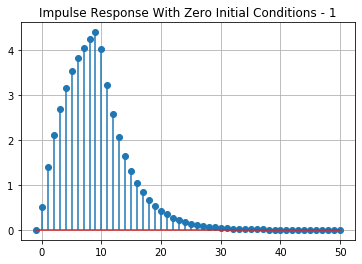

In [82]:
op_seq = [0]

for i in range(-1, n):
    op_seq.append(0.8*op_gen(i+1,op_seq) + 0.5*xn1(i+1) + 0.5*xn1(i))

plt.title("Impulse Response With Zero Initial Conditions - 1")
plt.grid()
plt.stem(np.arange(-1, 51, 1), op_seq, use_line_collection=True)

<StemContainer object of 3 artists>

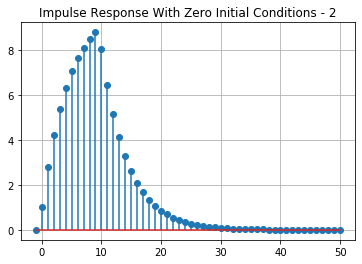

In [83]:
op_seq = [0]

for i in range(-1, n):
    op_seq.append(0.8*op_gen(i+1,op_seq) + 0.5*xn2(i+1) + 0.5*xn2(i))

plt.title("Impulse Response With Zero Initial Conditions - 2")
plt.grid()
plt.stem(np.arange(-1, 51, 1), op_seq, use_line_collection=True)

## Question 3
Find the convolution of the following  sequences. Plot the input and output sequences

\begin{equation}\nonumber
(a)~~~~~~~~~~~~~~~h[n]=u[n]-u[n-8],x[n]=u[n]-u[n-8]
\end{equation}
\begin{equation}\nonumber
(b)~~~~~~~~~h[n]=u[n]-u[n-8],x[n]=2^n (u[n]-u[n-8])
\end{equation}
\begin{equation}\nonumber
(c)~~h[n]=u[n]-u[n-8],x[n]=\cos(\frac{\pi n}{4})(u[n]-u[n-8]) 
\end{equation}

Use \textit{conv} funtion to find convolution.

<StemContainer object of 3 artists>

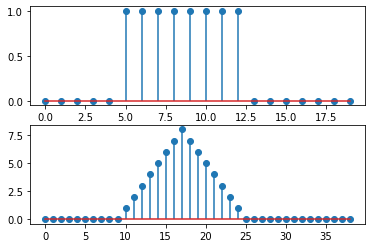

In [93]:
#(a)
n = np.arange(-5, 15, 1)
h = np.heaviside(n, 1) - np.heaviside(n-8, 1)
x = h

plt.subplot(2, 1, 1)
plt.stem(x,use_line_collection=True)

conv = np.convolve(h,x)
plt.subplot(2, 1, 2)
plt.stem(conv,use_line_collection=True)

<StemContainer object of 3 artists>

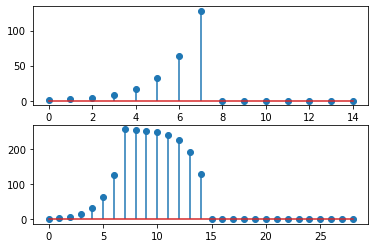

In [109]:
#(b)
n = np.arange(0, 15, 1)
h = np.heaviside(n, 1) - np.heaviside(n-8, 1)

x = []
for i in n:
    x.append(2**i * h[i])
    
plt.subplot(2, 1, 1)
plt.stem(x,use_line_collection=True)

conv = np.convolve(h,x)
plt.subplot(2, 1, 2)
plt.stem(conv,use_line_collection=True)

<StemContainer object of 3 artists>

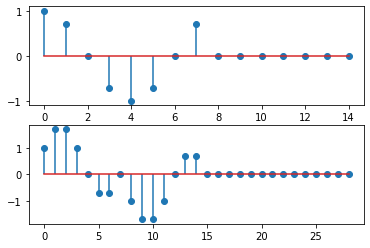

In [110]:
#(c)
n = np.arange(0, 15, 1)
h = np.heaviside(n, 1) - np.heaviside(n-8, 1)

x = np.cos(np.pi * n / 4) * h
    
plt.subplot(2, 1, 1)
plt.stem(x,use_line_collection=True)

conv = np.convolve(h,x)
plt.subplot(2, 1, 2)
plt.stem(conv,use_line_collection=True)

## Question 4
Find the impulse repsone of the system $y[n]=x[n]+x[n-1]+x[n-2]$. Is it recursive system or non recursive systems? Compare the impulse response of the system with the question $1$ in assignment-II. State whether it is FIR or IIR system.

<StemContainer object of 3 artists>

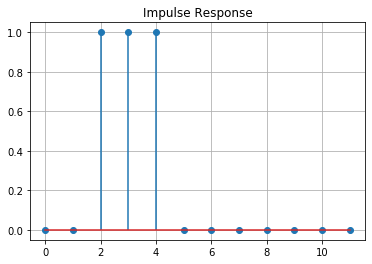

In [116]:
n=np.arange(-2, 10, 1)
y=[]
for i in n:
    y.append(impulse(i)+impulse(i-1)+impulse(i-2))
    
plt.title("Impulse Response")
plt.grid()
plt.stem(y, use_line_collection=True)

# Recursive
# Given system is FIR as the impulse response generated is Finite in nature.

## Question 5
Let consider the periodic signal $x[n]=1$ for $n=0$ to $L-1$ and zero for elsewhere with period $N$. Find the DTFS 
co-efficients $Nc_{k}$ of $x[n]$ and plot (using stem) the graph between $N|c_{k}|$ and $\frac{2\pi k}{N}$ for various values 
$L=2$ and $N=10,20,50,100,1000$ from $\frac{2\pi k}{N} = -4\pi$ to $4\pi$. For what, the terms  $\frac{2\pi }{N}$ and 
$\frac{2\pi k}{N}$ represents?  Provide in the report that what are all observation that you can make. (Note use the direct
formula given in class note to compute the $N|c_{k}|$)

(6) Consider the sinusoid 
$ s[n] = ( A \cos (\omega_0 n + \phi) ) $ where   $A=2, \omega_0 = \pi/4, \phi = \pi/6$.
Compute and plot the DTFT  from $[-\pi +\pi]$. Use samples from a finite time window (i) $n= [0, 21]$ (ii)$n = [0, 201]$.
Observe and compare the spectrum in both cases. 

{Note: While plotting the spectrum please obtain lot of points (eg: 4096)  so that the
	details are not lost. }

In [2]:
A = 2
omega = np.pi / 4
phi = np.pi / 6

n = np.arange(0, 21, 1)
s = A * np.cos((omega * n) + phi)

n = np.arange(0, 201, 1)
s = A * np.cos((omega * n) + phi)

(7) Compute the DTFT (magnitude and phase) of the following signals. Plot from $\omega = -2\pi$ to $2\pi$. 
Observe the symmetries and relations between the spectra.  
a. $r[n] = u[n] - u[n-9]$

b. $ r[n - 4] $

c. $ r[-n] $

d. $ (-\frac{1}{2})^n r[n] $




(8) Consider a signal $x[n] = u[n] - u[n-6]$    Plot the DTFT of the signal $X(e^{j\omega})$ in $[-\pi +\pi]$.  Consider an
expanded version of the signal \begin{equation*} 
z[n]= \left\{  \begin{array}{lll} x[\tfrac{n}{2}] & n & even \\ 0 & n & odd \end{array}   \right. \end{equation*}
Plot  $Z(e^{j\omega})$ (magnitude and phase separately).  What is the periodicity of the DTFT? Observe the effect of expanding time axis in the frequency domain.

(9) Find the DTFT of the violin and piano recordings.  Compare the spectra. How are they similar? How do they differ? 
({\em Obtain the violin and piano recordings from the internet or moodle})